# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [12]:
# import numpy and pandas
import pandas as pd
import numpy as np


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [13]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [14]:
# Your code here:
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [15]:
# Your code here:
legendary = pokemon[pokemon['Legendary']]
non_legendary = pokemon[pokemon['Legendary']==False]
nlegendary = len(legendary)
nnon_legendary = len(non_legendary)
print(f'Legendary : {nlegendary}, nonLegendary : {nnon_legendary}')


Legendary : 65, nonLegendary : 735


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [16]:
# Your code here
from scipy.stats import ttest_ind
ttest_ind(legendary.Total, non_legendary.Total, equal_var=False)

Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957444e-47)

What do you conclude from this test? Write your conclusions below.

In [17]:
# Your conclusions here:
# that pvalue is so small so we can conclude in deny hypothesis 

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [18]:
# Your code here:
poke_water_mean = pokemon.Total.loc[pokemon['Type 1']=='Water'].mean()
poke_water_std  = pokemon.Total.loc[pokemon['Type 1']=='Water'].std()
poke_nwater_mean = pokemon.Total.loc[pokemon['Type 1']!='Water'].mean()
poke_nwater_std  = pokemon.Total.loc[pokemon['Type 1']!='Water'].std()

print('poke_water_mean:', poke_water_mean)
print('poke_water_std :', poke_water_std)
print('poke_nwater_mean:', poke_nwater_mean)
print('poke_nwater_std :', poke_nwater_std)

poke_water_mean: 430.45535714285717
poke_water_std : 113.1882660643146
poke_nwater_mean: 435.85901162790697
poke_nwater_std : 121.0916823020807


In [43]:
pokemon['LegenType'] = np.where(pokemon['Legendary']==True,'Legendary','non_Legendary')
pokemon['LegenType']

0      non_Legendary
1      non_Legendary
2      non_Legendary
3      non_Legendary
4      non_Legendary
           ...      
795        Legendary
796        Legendary
797        Legendary
798        Legendary
799        Legendary
Name: LegenType, Length: 800, dtype: object

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

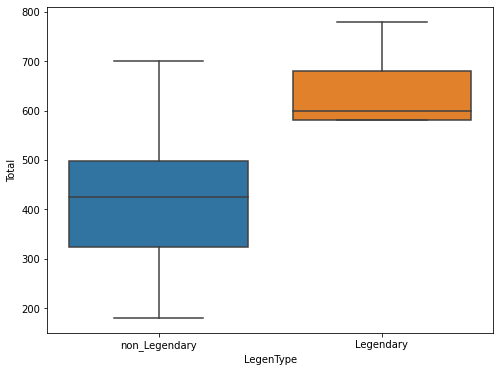

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='LegenType', y='Total', data=pokemon);

Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [50]:
# Your code here:
poke_water_mean = pokemon[pokemon['Type 1']=='Water']
poke_nwater_mean = pokemon[pokemon['Type 1']!='Water']

ttest_ind(poke_water_mean.Total, poke_nwater_mean.Total, equal_var=True)

Ttest_indResult(statistic=-0.4418547448849676, pvalue=0.6587140317488793)

Write your conclusion below.

In [10]:
# Your conclusions here:
# the power of Legendarian pokemons on average is a little bit smaller to the averange of all other pokemons

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [56]:
# Your code here:
from scipy.stats import ttest_rel

ttest_rel(pokemon.Attack, pokemon.Defense)

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Describe the results of the test in the cell below.

In [12]:
# Your conclusions here:
# Our result is a very small p-value. This means that we will reject the null hypothesis.

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [59]:
# Your code here:
ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])

Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

Describe the results of the test in the cell below.

In [60]:
# Your conclusions here:

# Our result is a big p-value. This means that we will approved the null hypothesis.

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [62]:
# Your code here:
from scipy.stats import ttest_1samp

ttest_1samp(pokemon.Attack - pokemon.Defense, 0)

Ttest_1sampResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [17]:
# Your code here:



Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [18]:
# Your code here:



Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:

